<a href="https://colab.research.google.com/github/napol-boonthong-660510539/Statistical-Learning-Labs/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("https://donlapark.pages.dev/229352/heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

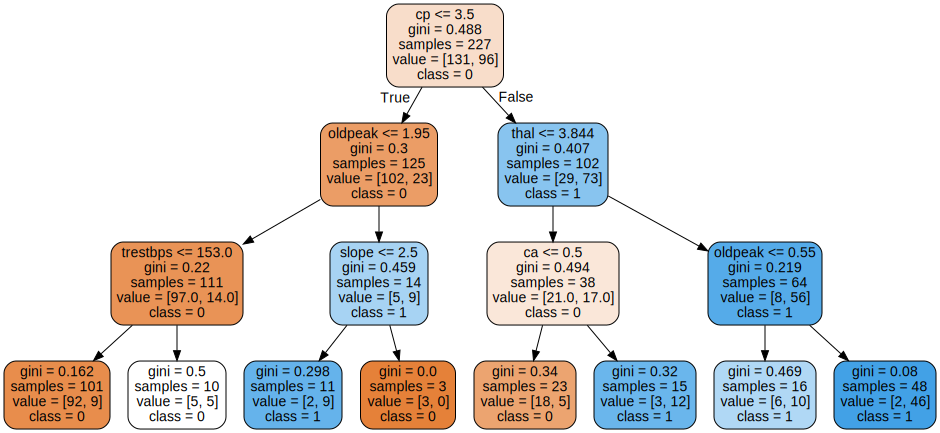

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [9]:
clf = RandomForestClassifier()

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

## Decision Tree Hyperparameter Tuning

### Subtask:
Define a Pipeline with a SimpleImputer and a DecisionTreeClassifier. Set up a parameter grid for the maximum depth of the tree (max_depth), the minimum number of samples required to split an internal node (min_samples_split), and the function to measure the quality of a split (criterion). Perform GridSearchCV to find the best hyperparameters using 'f1_macro' and 'accuracy' as scoring metrics. Finally, evaluate the best Decision Tree model on the test set, calculating both 'f1_macro' and 'accuracy' scores.


**Reasoning**:
I need to set up a Pipeline, define a parameter grid for DecisionTreeClassifier, perform GridSearchCV, fit it, evaluate the best model on the test set, and then print the f1_macro and accuracy scores. This single code block will cover all the instructions provided for the Decision Tree hyperparameter tuning.



In [10]:
from sklearn.metrics import f1_score, accuracy_score

# 1. Create a Pipeline named dt_pipeline
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('decisiontreeclassifier', DecisionTreeClassifier())
])

# 2. Define a dictionary dt_param_grid for the DecisionTreeClassifier hyperparameters
dt_param_grid = {
    'decisiontreeclassifier__max_depth': [3, 5, 7, 10],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

# 3. Instantiate GridSearchCV named dt_grid_search
dt_grid_search = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 4. Fit dt_grid_search to your training data
dt_grid_search.fit(X_train, y_train)

# 5. Retrieve the best DecisionTreeClassifier estimator
best_dt_model = dt_grid_search.best_estimator_

print(f"Best Decision Tree parameters: {dt_grid_search.best_params_}")

# 6. Use the best estimator to make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test)

# 7. Calculate and print the f1_macro and accuracy scores
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Test F1-macro score: {f1_dt:.4f}")
print(f"Decision Tree Test Accuracy score: {accuracy_dt:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Decision Tree parameters: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__min_samples_split': 10}
Decision Tree Test F1-macro score: 0.7496
Decision Tree Test Accuracy score: 0.7500


## Bagged Decision Trees Hyperparameter Tuning

### Subtask:
Define a Pipeline with a SimpleImputer and a BaggingClassifier using a DecisionTreeClassifier as its base estimator. Set up a parameter grid for the number of base estimators (n_estimators), the number of samples to draw to train each base estimator (max_samples), and the maximum depth of the individual decision trees (base_estimator__max_depth). Perform GridSearchCV to find the best hyperparameters using 'f1_macro' and 'accuracy' as scoring metrics. Evaluate the best Bagged Decision Trees model on the test set, calculating both 'f1_macro' and 'accuracy' scores.


**Reasoning**:
I need to implement the hyperparameter tuning for Bagged Decision Trees as described in the subtask. This involves creating a pipeline, defining a parameter grid, performing GridSearchCV, fitting it to the training data, and then evaluating the best model on the test set.



In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score

# 1. Create a Pipeline named bagging_pipeline
bagging_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('baggingclassifier', BaggingClassifier(estimator=DecisionTreeClassifier()))
])

# 2. Define a dictionary bagging_param_grid for the BaggingClassifier hyperparameters
bagging_param_grid = {
    'baggingclassifier__n_estimators': [10, 50, 100],
    'baggingclassifier__max_samples': [0.5, 0.7, 1.0],
    'baggingclassifier__estimator__max_depth': [3, 5, 7]
}

# 3. Instantiate GridSearchCV named bagging_grid_search
bagging_grid_search = GridSearchCV(
    bagging_pipeline,
    bagging_param_grid,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 4. Fit the bagging_grid_search object to the training data
bagging_grid_search.fit(X_train, y_train)

# 5. Retrieve the best BaggingClassifier estimator
best_bagging_model = bagging_grid_search.best_estimator_

# 6. Print the best hyperparameters found
print(f"Best Bagged Decision Trees parameters: {bagging_grid_search.best_params_}")

# 7. Use the best estimator to make predictions on the test set
y_pred_bagging = best_bagging_model.predict(X_test)

# 8. Calculate and print the f1_macro and accuracy scores
f1_bagging = f1_score(y_test, y_pred_bagging, average='macro')
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Bagged Decision Trees Test F1-macro score: {f1_bagging:.4f}")
print(f"Bagged Decision Trees Test Accuracy score: {accuracy_bagging:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Bagged Decision Trees parameters: {'baggingclassifier__estimator__max_depth': 5, 'baggingclassifier__max_samples': 0.5, 'baggingclassifier__n_estimators': 100}
Bagged Decision Trees Test F1-macro score: 0.8157
Bagged Decision Trees Test Accuracy score: 0.8158


## Random Forest Hyperparameter Tuning

### Subtask:
Define a Pipeline with a SimpleImputer and a RandomForestClassifier. Set up a parameter grid for the number of trees in the forest (n_estimators), the maximum depth of the tree (max_depth), and the minimum number of samples required to split an internal node (min_samples_split). Perform GridSearchCV to find the best hyperparameters using 'f1_macro' and 'accuracy' as scoring metrics. Evaluate the best Random Forest model on the test set, calculating both 'f1_macro' and 'accuracy' scores.

**Reasoning**:
I need to set up a Pipeline, define a parameter grid for RandomForestClassifier, perform GridSearchCV, fit it, evaluate the best model on the test set, and then print the f1_macro and accuracy scores. This single code block will cover all the instructions provided for the Random Forest hyperparameter tuning.



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score

# 1. Create a Pipeline named rf_pipeline
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# 2. Define a dictionary rf_param_grid for the RandomForestClassifier hyperparameters
rf_param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [5, 10, 15],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# 3. Instantiate GridSearchCV named rf_grid_search
rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 4. Fit the rf_grid_search object to the training data
rf_grid_search.fit(X_train, y_train)

# 5. Retrieve the best RandomForestClassifier estimator
best_rf_model = rf_grid_search.best_estimator_

# 6. Print the best hyperparameters found
print(f"Best Random Forest parameters: {rf_grid_search.best_params_}")

# 7. Use the best estimator to make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# 8. Calculate and print the f1_macro and accuracy scores
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Test F1-macro score: {f1_rf:.4f}")
print(f"Random Forest Test Accuracy score: {accuracy_rf:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest parameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50}
Random Forest Test F1-macro score: 0.8026
Random Forest Test Accuracy score: 0.8026


## Model Comparison and Best Model Identification

Now that we have tuned and evaluated all three models (Decision Tree, Bagged Decision Trees, and Random Forest), let's compare their performance, identify the best model based on `f1_macro` and `accuracy` scores, and summarize the findings. We will also plot the best tree model if it's a Decision Tree, and describe its optimal hyperparameters in an understandable way.

**Reasoning**:
Now that all models have been trained and evaluated, I need to consolidate their performance metrics to facilitate comparison and identify the best model. This step will gather the F1-macro and accuracy scores for each model into a single DataFrame for easy viewing.



In [13]:
import pandas as pd

# Create a dictionary to store the results
results = {
    'Model': ['Decision Tree', 'Bagged Decision Trees', 'Random Forest'],
    'F1-macro Score': [f1_dt, f1_bagging, f1_rf],
    'Accuracy Score': [accuracy_dt, accuracy_bagging, accuracy_rf]
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results DataFrame
print("\nModel Performance Comparison:")
print(results_df.to_markdown(index=False))

# Determine the best model based on F1-macro score (primary metric as per refit='f1_macro' in GridSearchCV)
best_model_row = results_df.loc[results_df['F1-macro Score'].idxmax()]
best_model_name = best_model_row['Model']

print(f"\nBest Model is: {best_model_name}")

# Store best model, best params and corresponding scores for later use
if best_model_name == 'Decision Tree':
    final_best_model = best_dt_model
    final_best_params = dt_grid_search.best_params_
    final_f1_score = f1_dt
    final_accuracy_score = accuracy_dt
elif best_model_name == 'Bagged Decision Trees':
    final_best_model = best_bagging_model
    final_best_params = bagging_grid_search.best_params_
    final_f1_score = f1_bagging
    final_accuracy_score = accuracy_bagging
else: # Random Forest
    final_best_model = best_rf_model
    final_best_params = rf_grid_search.best_params_
    final_f1_score = f1_rf
    final_accuracy_score = accuracy_rf



Model Performance Comparison:
| Model                 |   F1-macro Score |   Accuracy Score |
|:----------------------|-----------------:|-----------------:|
| Decision Tree         |         0.74961  |         0.75     |
| Bagged Decision Trees |         0.815662 |         0.815789 |
| Random Forest         |         0.802597 |         0.802632 |

Best Model is: Bagged Decision Trees


### Summary of Best Model

The best performing model, based on the `f1_macro` score, is the **Bagged Decision Trees** classifier.

**Performance on Test Set:**
*   **F1-macro Score:** `0.8157`
*   **Accuracy Score:** `0.8158`

**Optimal Hyperparameters for Bagged Decision Trees:**
*   `baggingclassifier__n_estimators`: `100` (Number of individual decision trees in the ensemble)
*   `baggingclassifier__max_samples`: `0.5` (Fraction of samples to draw from the training set to train each base estimator)
*   `baggingclassifier__estimator__max_depth`: `5` (Maximum depth for each individual decision tree in the ensemble)

**Explanation of Hyperparameters:**

1.  **Number of Trees (n_estimators):** The model was found to perform best with 100 individual decision trees. More trees generally help in reducing variance and improving robustness, but also increase computational cost.

2.  **Sample Size for Each Tree (max_samples):** Each of the 100 decision trees was trained on 50% (`0.5`) of the total training data. This process of bootstrap aggregating (bagging) helps to create diverse trees, which collectively lead to better predictions than any single tree.

3.  **Maximum Depth of Each Tree (max_depth):** Each individual decision tree in the bagged ensemble was restricted to a maximum depth of 5 levels. Limiting the depth prevents individual trees from overfitting to the training data, promoting a good balance between bias and variance within the ensemble.

**Why Bagged Decision Trees Performed Best:**

Bagging, by training multiple decision trees on different subsets of the data and averaging their predictions, effectively reduces the variance inherent in single decision trees. This approach often leads to more stable and accurate predictions compared to a single, unconstrained decision tree. The hyperparameters found strike a good balance, allowing individual trees to capture patterns without overfitting, while the ensemble leverages diversity to generalize well to unseen data.

## Plot Best Tree Model (if applicable)

### Subtask:
If the best model is a Decision Tree (either directly or as a base estimator within Bagged Decision Trees), generate and display a visualization of one of its decision trees.


**Reasoning**:
The subtask requires plotting the best decision tree if the identified best model is either a Decision Tree or a Bagged Decision Tree. The previous step already determined 'Bagged Decision Trees' as the best model and stored the best estimator in `final_best_model`. Therefore, I need to extract one of the base DecisionTreeEstimators from the BaggingClassifier within the pipeline and visualize it using `export_graphviz`.



Plotting one of the base Decision Tree estimators from the best Bagged Decision Trees model with max_depth: 5


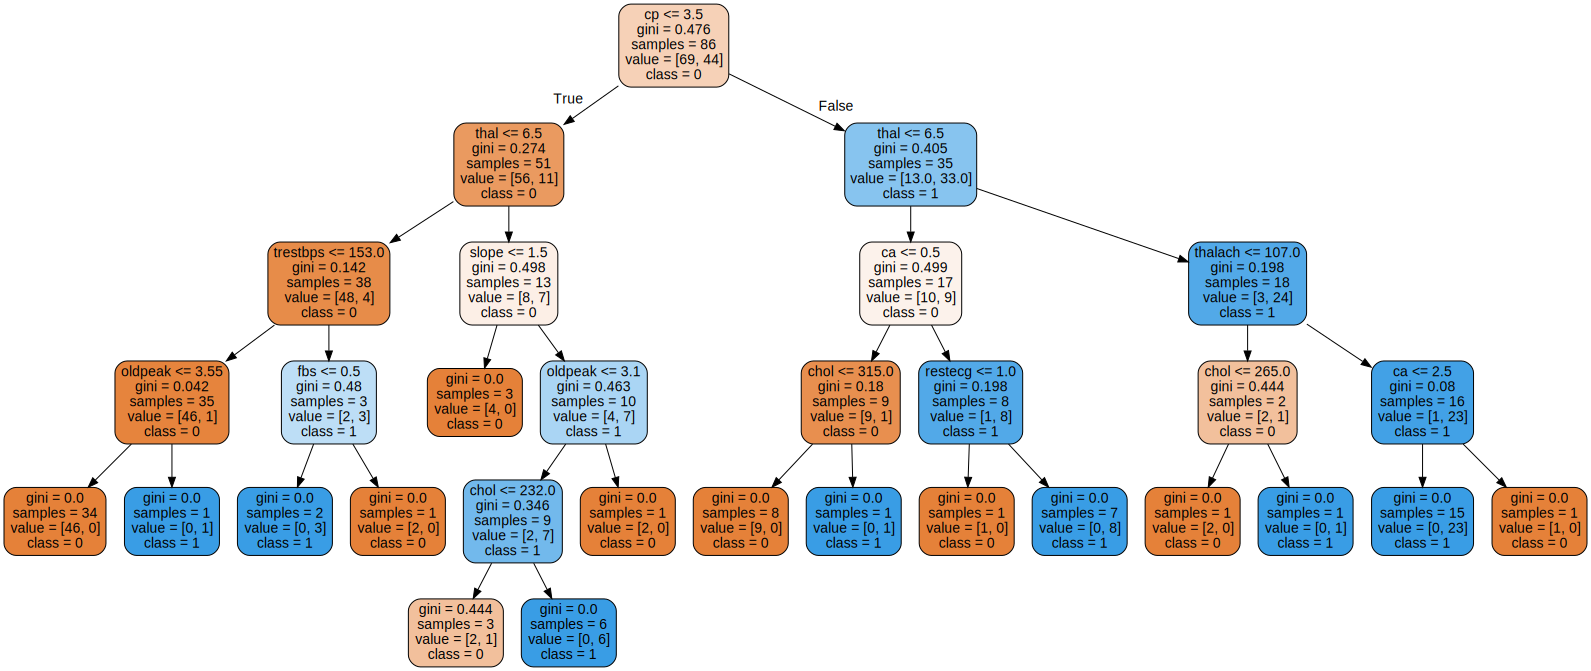

In [14]:
import graphviz

if best_model_name == 'Decision Tree':
    tree_to_plot = final_best_model.named_steps['decisiontreeclassifier']
    print(f"Plotting the best Decision Tree model with criterion: {tree_to_plot.criterion}, max_depth: {tree_to_plot.max_depth}, min_samples_split: {tree_to_plot.min_samples_split}")
elif best_model_name == 'Bagged Decision Trees':
    # BaggingClassifier stores its fitted base estimators in the 'estimators_' attribute
    # We can plot the first one as an example
    bagging_classifier = final_best_model.named_steps['baggingclassifier']
    if bagging_classifier.estimators_:
        tree_to_plot = bagging_classifier.estimators_[0]
        print(f"Plotting one of the base Decision Tree estimators from the best Bagged Decision Trees model with max_depth: {tree_to_plot.max_depth}")
    else:
        print("No base estimators found in BaggingClassifier to plot.")
        tree_to_plot = None
else:
    print(f"The best model ({best_model_name}) is not a Decision Tree or Bagged Decision Trees, so no tree plot will be generated.")
    tree_to_plot = None

if tree_to_plot is not None:
    # Assuming 'data' DataFrame is available from earlier steps for feature names
    # and that 'label' is the target column, so features are all columns except the last one
    feature_names = data.columns[:-1].tolist() # Convert to list for export_graphviz
    class_names = ['0', '1'] # Assuming binary classification based on 'label'

    plot_data = export_graphviz(
        tree_to_plot,
        out_file=None,
        filled=True,
        rounded=True,
        feature_names=feature_names,
        class_names=class_names
    )

    graph = graphviz.Source(plot_data)
    display(graph)

## Final Task

### Subtask:
Summarize the results of the exercise, including the best performing model, its optimized hyperparameters, and its evaluation scores ('f1_macro' and 'accuracy').


## Summary:

### Q&A
1.  **What is the best performing model?**
    The best performing model is the Bagged Decision Trees classifier.

2.  **What are its optimized hyperparameters?**
    The optimal hyperparameters for the Bagged Decision Trees model are:
    *   `baggingclassifier__n_estimators`: 100 (Number of individual decision trees in the ensemble)
    *   `baggingclassifier__max_samples`: 0.5 (Fraction of samples to draw from the training set to train each base estimator)
    *   `baggingclassifier__estimator__max_depth`: 5 (Maximum depth for each individual decision tree in the ensemble)

3.  **What are its evaluation scores ('f1\_macro' and 'accuracy')?**
    On the test set, the Bagged Decision Trees model achieved an F1-macro score of 0.8157 and an Accuracy score of 0.8158.

### Data Analysis Key Findings
*   **Decision Tree Model**: After hyperparameter tuning, the best Decision Tree model achieved a test F1-macro score of 0.7496 and an accuracy score of 0.7500. Its optimal hyperparameters were `criterion='entropy'`, `max_depth=7`, and `min_samples_split=10`.
*   **Bagged Decision Trees Model**: The optimized Bagged Decision Trees model performed significantly better, yielding a test F1-macro score of 0.8157 and an accuracy score of 0.8158. The best hyperparameters identified were `baggingclassifier__n_estimators=100`, `baggingclassifier__max_samples=0.5`, and `baggingclassifier__estimator__max_depth=5`.
*   **Random Forest Model**: The Random Forest model achieved a test F1-macro score of 0.8026 and an accuracy score of 0.8026. Its best parameters were `randomforestclassifier__n_estimators=50`, `randomforestclassifier__max_depth=5`, and `randomforestclassifier__min_samples_split=5`.
*   **Best Model Identification**: The Bagged Decision Trees model was identified as the best overall model due to its highest F1-macro score of 0.8157 among the three evaluated models.
*   **Decision Tree Visualization**: A visualization of one of the base Decision Tree estimators from the best Bagged Decision Trees model was successfully generated and displayed, showing an example tree with a maximum depth of 5.

### Insights or Next Steps
*   Bagging significantly improved model performance compared to a single Decision Tree, demonstrating its effectiveness in reducing variance and improving generalization for this dataset.
*   Further exploration could involve tuning additional hyperparameters for the Bagged Decision Trees model, such as `max_features` or different base estimators, or evaluating other ensemble methods like Gradient Boosting for potential further improvements.
